In [14]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [15]:
df=pd.read_csv('classification_data.csv')
df.head()

,Feature1,Feature2,Label
0,-0.503286,-0.175916,0
1,-1.138264,-0.885082,0
2,-0.352311,-1.176922,0
3,0.523030,0.111676,0
4,-1.234153,0.531000,0


In [16]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

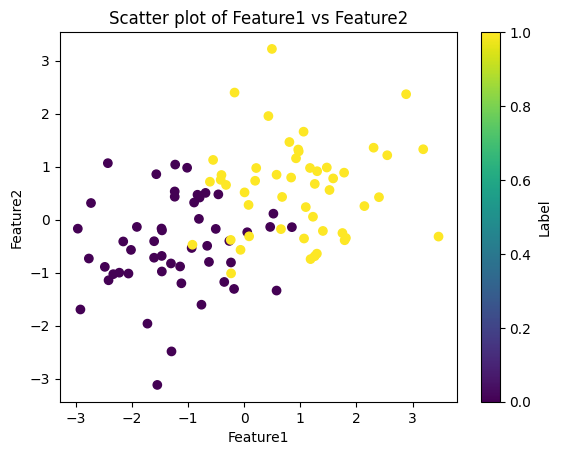

In [17]:
plt.scatter(df['Feature1'], df['Feature2'], c=df['Label'], cmap='viridis')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Scatter plot of Feature1 vs Feature2')
plt.colorbar(label='Label')
plt.show()

In [18]:
from tensorflow import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense

In [19]:
model=Sequential()
model.add(Dense(10,activation="sigmoid",input_dim=2))
# model.add(Dense(10,activation="sigmoid",input_dim=2))
model.add(Dense(1,activation="sigmoid"))
model.summary()

c:\Anaconda3\envs\TF_D\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.get_weights()

[array([[-0.70591015,  0.20741981,  0.04828107,  0.32672662,  0.49381942,
         -0.13150692, -0.26947194, -0.6233856 ,  0.57513267,  0.03012252],
        [ 0.2502498 ,  0.41314822, -0.16520905, -0.43523163, -0.3337614 ,
          0.34989506,  0.33623642,  0.3823139 , -0.20209968, -0.36745763]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.27135092],
        [ 0.41887742],
        [ 0.10478377],
        [-0.09925419],
        [ 0.6297969 ],
        [ 0.1481458 ],
        [-0.6760978 ],
        [-0.7029524 ],
        [ 0.593996  ],
        [-0.50062275]], dtype=float32),
 array([0.], dtype=float32)]

In [21]:
initial_weights = model.get_weights()
for i in range(len(initial_weights)):
    initial_weights[i] = np.zeros_like(initial_weights[i])
model.set_weights(initial_weights)

In [22]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
history=model.fit(df[['Feature1','Feature2']],df['Label'],epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4847 - loss: 0.6932  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4743 - loss: 0.6933 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4719 - loss: 0.6931 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5146 - loss: 0.6931 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4563 - loss: 0.6937 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4656 - loss: 0.6934 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5052 - loss: 0.6931 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5094 - loss: 0.6931 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5177 - loss: 0.6931 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5000 - loss: 0.6932 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5240 - loss: 0.6931 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4979 - lo

In [25]:
model.get_weights()

[array([[0.56726784, 0.56726784, 0.56726784, 0.56726784, 0.56726784,
         0.56726784, 0.56726784, 0.56726784, 0.56726784, 0.56726784],
        [0.5029249 , 0.5029249 , 0.5029249 , 0.5029249 , 0.5029249 ,
         0.5029249 , 0.5029249 , 0.5029249 , 0.5029249 , 0.5029249 ]],
       dtype=float32),
 array([-0.1646798, -0.1646798, -0.1646798, -0.1646798, -0.1646798,
        -0.1646798, -0.1646798, -0.1646798, -0.1646798, -0.1646798],
       dtype=float32),
 array([[0.10403878],
        [0.10403878],
        [0.10403878],
        [0.10403878],
        [0.10403878],
        [0.10403878],
        [0.10403878],
        [0.10403878],
        [0.10403878],
        [0.10403878]], dtype=float32),
 array([-0.07658482], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 4s 390us/step


<Axes: >

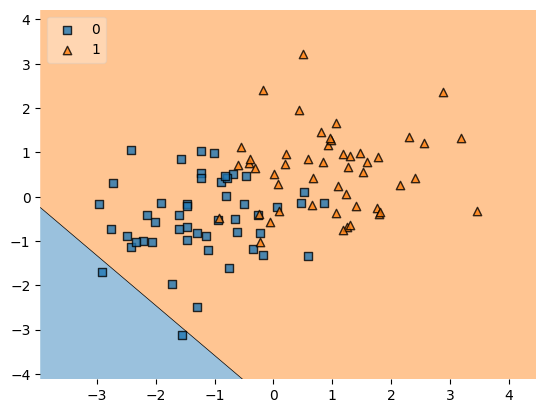

In [26]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=df[['Feature1','Feature2']].values, y=df['Label'].values, clf=model, legend=2)